# Project: Investigate a Dataset - FBI/NCIS, Census and Election Results

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

### Dataset Description 

> The FBI/NCIS data is a large data set of gun registrations by state. Census data covers a large variety of facts related to population statistics in each region of the US. I will be creating a dataframe that will hold the election results from 2012 and 2016 for 3 states the "flipped" from Democrat Obama to Republican Trump.


### Question(s) for Analysis
>Is there a relationship between gun registration numbers and the change in presidential election results?

In [1]:
import pandas as pd
import numpy as np
import os
%matplotlib inline

os.listdir()

['U.S. Census Data.csv',
 'Investigate_a_Dataset.html',
 'Database_No_show_appointments',
 'Database_Ncis_and_Census_data',
 'gun_data.xlsx',
 '.ipynb_checkpoints',
 'Database_TMDb_movie_data',
 'Investigate_a_Dataset.ipynb',
 'Database_Soccer']

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==1.1.5

Requirement already up-to-date: pandas==1.1.5 in /opt/conda/lib/python3.6/site-packages (1.1.5)


<a id='wrangling'></a>
## Data Wrangling

### Loading in data
> Each of the three data sets has a different way to create it into a frame due to file type or reading method. I will need to read the gun data as an excel, census data as a csv and create election data as a new dataframe.

In [3]:
#Loading gun data
df_gun = pd.DataFrame(pd.read_excel('gun_data.xlsx'))
df_gun.head(2)


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303


In [4]:
#loading in Census Data

df_census = pd.DataFrame(pd.read_csv('U.S. Census Data.csv', header=0))
df_census.head(2)


,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"


In [5]:
# I am now creating a data frame from public data on the 2012 and 2016 election for 3 states that flipped from D to R
# This data was gathered from the public info on the Wikipedia articles regardint the 2012 and 2016 US Presidential
# Election, wikipedia.org/wiki/2012_United_States_presidential_election, wikipedia.org/wiki/2016_United_States_presidential_election

d = {'Iowa': [822544, 730617, 653669, 800983], 'Wisconsin': [1620985, 1407966, 1382536, 1405284], 'Michigan': [2564569, 2115256, 2268839, 2279543]}
df_election = pd.DataFrame(data=d, index=['2012 D', '2012 R', '2016 D', '2016 R'])
df_election = df_election.T
df_election

,2012 D,2012 R,2016 D,2016 R
Iowa,822544,730617,653669,800983
Wisconsin,1620985,1407966,1382536,1405284
Michigan,2564569,2115256,2268839,2279543



### Data Cleaning
<p> In order to come to preliminary conclusions, we will need to ensure data formats for each frame are consistent. Dates will need to be converted to datetime types. The Election and Census data have similar structures with States as Columns but Gun data has states as rows. We will also be removing all data not pertaining to the 3 states in the Election dataframe for the months of November 2012 and November 2016. A more detailed analysis could follow if a trend is seen with the static data of the election month but is beyond the initial scope of this project.</p>

#### Gun Data

In [6]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [7]:
# For this initial analysis, I need the data associated with the 3 states referenced in the created election dataframe and 
# the appropriate dates for the election. I will also need to convert 'month' into a datetime from a string
# reminder that pandas stores strings as objects

# convert to date time
df_gun['month'] = pd.to_datetime(df_gun['month'])
print(df_gun['month'].dtypes)

datetime64[ns]


In [8]:
# In this analysis, we are only concerned with the month, state and total guns columns so we will now drop unecessary columns
# FIXIT use same filtering method learned below for Cenus data
cols = ['permit', 'permit_recheck', 'handgun', 'long_gun','other','multiple','admin', 'prepawn_handgun', 'prepawn_long_gun','prepawn_other','redemption_handgun','redemption_long_gun','redemption_other','returned_handgun','returned_long_gun','returned_other','rentals_handgun','rentals_long_gun','private_sale_handgun','private_sale_long_gun','private_sale_other','return_to_seller_handgun','return_to_seller_long_gun','return_to_seller_other']

df_gun = df_gun.drop(cols, axis=1)
df_gun.head()

,month,state,totals
0,2017-09-01,Alabama,32019
1,2017-09-01,Alaska,6303
2,2017-09-01,Arizona,28394
3,2017-09-01,Arkansas,17747
4,2017-09-01,California,123506


In [9]:
# Next, let's limit the states we are chosing from

states = ['Iowa', 'Michigan', 'Wisconsin']
df_gun = df_gun[df_gun['state'].isin(states)]

In [10]:
# Perfect! Now let's use the same process for dates
dates = ['2012-11-01', '2016-11-01']

df_gun = df_gun[df_gun['month'].isin(dates)]
#and some renaming to help us later. We want to be clear that the election year and total gun registrations are clearly labeled
df_gun.rename(columns={'month': 'election_year', 'totals': 'gun_total'}, inplace=True)

#I would also like to normalize data a but more and rearrange state to be the first column
df_gun = df_gun[['state', 'election_year', 'gun_total']]
df_gun

,state,election_year,gun_total
566,Iowa,2016-11-01,18540
574,Michigan,2016-11-01,56137
603,Wisconsin,2016-11-01,65277
3206,Iowa,2012-11-01,16155
3214,Michigan,2012-11-01,45249
3243,Wisconsin,2012-11-01,44890


In [11]:
#Notice election year is a full date, lets extract only the year for the column

df_gun['election_year'] = pd.DatetimeIndex(df_gun['election_year']).year
df_gun

,state,election_year,gun_total
566,Iowa,2016,18540
574,Michigan,2016,56137
603,Wisconsin,2016,65277
3206,Iowa,2012,16155
3214,Michigan,2012,45249
3243,Wisconsin,2012,44890


In [12]:
#todo split 2012 and 2016 into separate tables and rejoin them on the state column with ELECTION YAR as primary key of dataframe

#Here I will split the tables by group and perform a left join on state name

df_1 = df_gun.iloc[:3,:]
df_1

,state,election_year,gun_total
566,Iowa,2016,18540
574,Michigan,2016,56137
603,Wisconsin,2016,65277


In [13]:
#This dataframe now has the uncessary year column. Let's rename gun_total to gun_total_2016 and remove election year entirely
cols = ['election_year']
df_1.drop(cols, axis=1, inplace=True)
df_1.rename(columns={"gun_total": 'gun_total_2016'}, inplace=True)
df_1

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,state,gun_total_2016
566,Iowa,18540
574,Michigan,56137
603,Wisconsin,65277


In [14]:
#repeating above but with the 2012 portion of the data
df_2 = df_gun.iloc[3:,:]
cols = ['election_year']
df_2.drop(cols, axis=1, inplace=True)
df_2.rename(columns={"gun_total": 'gun_total_2012'}, inplace=True)
df_2

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,state,gun_total_2012
3206,Iowa,16155
3214,Michigan,45249
3243,Wisconsin,44890


In [15]:
# Now we can left join the dataframes back into df_gun_cleaned giving us state, 2012 and 2016 gun registration totals

df_gun_cleaned = df_1.merge(df_2, how='left')
df_gun_cleaned = df_gun_cleaned.set_index('state')
df_gun_cleaned

,gun_total_2016,gun_total_2012
state,,
Iowa,18540,16155
Michigan,56137,45249
Wisconsin,65277,44890


In [16]:
#This is now in the same format as our election data. We can now join the election data in a new dataframe

df_gun_election = pd.merge(df_gun_cleaned, df_election, left_index=True, right_index=True)
df_gun_election

,gun_total_2016,gun_total_2012,2012 D,2012 R,2016 D,2016 R
Iowa,18540,16155,822544,730617,653669,800983
Michigan,56137,45249,2564569,2115256,2268839,2279543
Wisconsin,65277,44890,1620985,1407966,1382536,1405284


> Cleaning of gun data and merging it with the election data into a flat file has been complete. Next up is working with the census data to merge it's data in

#### Census

In [17]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [18]:
# In order to get data in line with our other 2 data frames, we will need to eliminate the states we do not want, 
# ensure we are looking at total population estimates f0r the dates closest to the election, 2010 and 2016 respectively.

test_df = df_census.iloc[:, np.r_[0:1,16, 23, 50]]

test_df.head()

,Fact,Iowa,Michigan,Wisconsin
0,"Population estimates, July 1, 2016, (V2016)","3,134,693","9,928,300","5,778,708"
1,"Population estimates base, April 1, 2010, (V2...","3,046,869","9,884,129","5,687,289"
2,"Population, percent change - April 1, 2010 (es...",2.90%,0.40%,1.60%
3,"Population, Census, April 1, 2010","3,046,355","9,883,640","5,686,986"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.40%,5.80%,5.80%


In [19]:
# Let's try a transpose to have the data match the file format of the gun data

df_test = test_df.set_index('Fact').T

df_test



Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Iowa,"3,134,693","3,046,869",2.90%,"3,046,355",6.40%,6.60%,23.30%,23.90%,16.40%,14.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Michigan,"9,928,300","9,884,129",0.40%,"9,883,640",5.80%,6.00%,22.10%,23.70%,16.20%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wisconsin,"5,778,708","5,687,289",1.60%,"5,686,986",5.80%,6.30%,22.30%,23.60%,16.10%,13.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Now to remove rows that we are not interested in, and use .info to see our new columns
df_test.info()



<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Iowa to Wisconsin
Data columns (total 85 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   Population estimates, July 1, 2016,  (V2016)                                            3 non-null      object
 1   Population estimates base, April 1, 2010,  (V2016)                                      3 non-null      object
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   3 non-null      object
 3   Population, Census, April 1, 2010                                                       3 non-null      object
 4   Persons under 5 years, percent, July 1, 2016,  (V2016)                                  3 non-null      object
 5   Persons under 5 years, percent, April 1, 2010                               

In [21]:
# lets remove columns that are not population, we will remove the 2010 April Estimate in favor of 

test = df_test.iloc[:, np.r_[0, 2:4]]
test
             


Fact,"Population estimates, July 1, 2016, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010"
Iowa,"3,134,693",2.90%,"3,046,355"
Michigan,"9,928,300",0.40%,"9,883,640"
Wisconsin,"5,778,708",1.60%,"5,686,986"


In [22]:
# Types need to be converted, populations to INTs and percentages to floats
test = test.replace(',','', regex=True)
test = test.replace('%','', regex=True)

In [23]:
# Time to create the final dataframe flat file

df_analysis = pd.merge(df_gun_election, test, left_index=True, right_index=True)
df_analysis

,gun_total_2016,gun_total_2012,2012 D,2012 R,2016 D,2016 R,"Population estimates, July 1, 2016, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010"
Iowa,18540,16155,822544,730617,653669,800983,3134693,2.90,3046355
Michigan,56137,45249,2564569,2115256,2268839,2279543,9928300,0.40,9883640
Wisconsin,65277,44890,1620985,1407966,1382536,1405284,5778708,1.60,5686986


In [24]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Iowa to Wisconsin
Data columns (total 9 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   gun_total_2016                                                                         3 non-null      int64 
 1   gun_total_2012                                                                         3 non-null      int64 
 2   2012 D                                                                                 3 non-null      int64 
 3   2012 R                                                                                 3 non-null      int64 
 4   2016 D                                                                                 3 non-null      int64 
 5   2016 R                                                                              

### Analysis Flat File
> The last flat file still needs some cleaning. The last 3 columns need to be converted to floats and ints

In [25]:
df_analysis = df_analysis.astype({'Population estimates, July 1, 2016,  (V2016)': 'int64'})
df_analysis = df_analysis.astype({'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)': 'float'})
df_analysis = df_analysis.astype({'Population, Census, April 1, 2010' : 'int64'})
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Iowa to Wisconsin
Data columns (total 9 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   gun_total_2016                                                                         3 non-null      int64  
 1   gun_total_2012                                                                         3 non-null      int64  
 2   2012 D                                                                                 3 non-null      int64  
 3   2012 R                                                                                 3 non-null      int64  
 4   2016 D                                                                                 3 non-null      int64  
 5   2016 R                                                                       

In [26]:
# Something to notice is that population estiamtes will not be in November of each year. A deeper analysis would require
# conversion techniques on population samples to get the estimated populations in those periods. For this analysis, I am
# limited to using the given numbers here. 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Was there a trend up in gun registrations?

In [27]:
df_analysis

,gun_total_2016,gun_total_2012,2012 D,2012 R,2016 D,2016 R,"Population estimates, July 1, 2016, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010"
Iowa,18540,16155,822544,730617,653669,800983,3134693,2.9,3046355
Michigan,56137,45249,2564569,2115256,2268839,2279543,9928300,0.4,9883640
Wisconsin,65277,44890,1620985,1407966,1382536,1405284,5778708,1.6,5686986


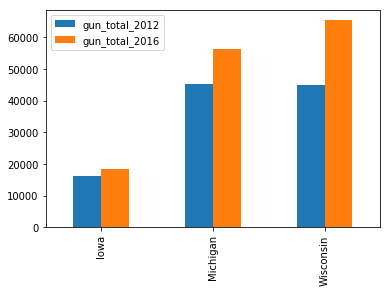

In [28]:
# First, lets get the gun trends for each state as a raw numbers trend then compare to the proportion of population to each state

df_analysis.plot.bar(y=['gun_total_2012', 'gun_total_2016']);


> There was for sure growth in raw numbers for gun registration in each state.

### Does gun registration proportionally trend with population?

In [29]:
# from here we can clearly see each state had more total guns in 2016 than 2012, as expected from the dataframe. But did this
# growth outpace the change in population? We need to do simple calulation of 2012 gun registrations / total poulation and compare
# to column 7

#this function does a simple percent change add column based on inputs of previous columms
def create_new_column(column_name, col1, col2):
    df_analysis['{}'.format(column_name)] = df_analysis.iloc[:, col1] / df_analysis.iloc[:, col2]

#create percent of gun owners in each state in 2016   
create_new_column('perc_gun_2016', 0, 6)

#same as above but 2012
create_new_column('perc_gun_2012', 1, 8)

#Now to find the percent growth from 2012 to 2016
create_new_column('gun_own_growth', 9, 10)

# below is a calulation to show the growth of republican voting from 2012 to 2016
df_analysis['rep_growth'] =(df_analysis.iloc[:, 5] / df_analysis.iloc[:, 6]) /  (df_analysis.iloc[:, 3] / df_analysis.iloc[:, 8])

df_analysis

,gun_total_2016,gun_total_2012,2012 D,2012 R,2016 D,2016 R,"Population estimates, July 1, 2016, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010",perc_gun_2016,perc_gun_2012,gun_own_growth,rep_growth
Iowa,18540,16155,822544,730617,653669,800983,3134693,2.9,3046355,0.005914,0.005303,1.115291,1.065416
Michigan,56137,45249,2564569,2115256,2268839,2279543,9928300,0.4,9883640,0.005654,0.004578,1.235043,1.072820
Wisconsin,65277,44890,1620985,1407966,1382536,1405284,5778708,1.6,5686986,0.011296,0.007893,1.431074,0.982253


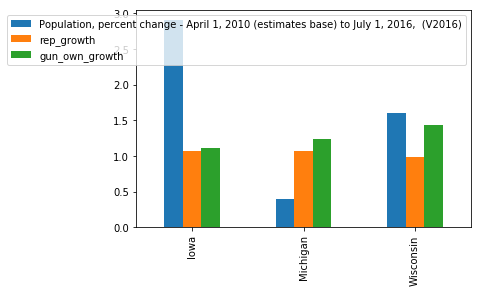

In [30]:
df_analysis.plot.bar(y=[7, -1, -2]);

> Gun growth over the 4 years does not correspond with any of these 3 states population change over the 4 year period. Other than Wisconsin, Population and gun growth singificantly differ. Iowa's gun growth corresponded closely with republican support growth.


In [31]:
df_analysis.iloc[:, np.r_[7, -1, -2]].describe()

df_stats = df_analysis.iloc[:, np.r_[7, -1, -2]].describe()
df_stats

,"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",rep_growth,gun_own_growth
count,3.000000,3.000000,3.000000
mean,1.633333,1.040163,1.260469
std,1.250333,0.050288,0.159419
min,0.400000,0.982253,1.115291
25%,1.000000,1.023834,1.175167
50%,1.600000,1.065416,1.235043
75%,2.250000,1.069118,1.333059
max,2.900000,1.072820,1.431074


> using describe, we can see that gun growth outpaces rep growth by about 21%

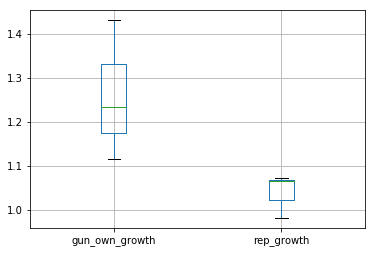

In [32]:



df_analysis.boxplot(column=['gun_own_growth', 'rep_growth']);


> Republican vote growth through the 3 states does not enter into any range of the gun growth, suggesting the two do not correlate

<a id='conclusions'></a>
## Conclusions

> Gun registrations are not a clear indicator of growing support of republican electoral support despite a trend in higher gun reigstrations for each state.

### Limitation
>  A few limits to this analysis include:
        1. Not every flipped state was included
        2. Registration data for each party was not included
        3. There was not an analysis done on proporition of voters compared to gun registration data
        4. FBI/NCIS gun data is total weapons, a single owner may own multiple weapons
        5. Census data was not altered using the percent growth to get more accurate november dates.
        
### Referenced work

> Election data was pulled from wikipedia.
    https://en.wikipedia.org/wiki/2012_United_States_presidential_election
    https://en.wikipedia.org/wiki/2016_United_States_presidential_election



## OPTIONAL: Question for the reviewer
 

> I could not rename the headers of the CSV with any method that I tried. How can I clean up that string of headers to prevent the abysmally long names?

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0